## Deutsch's algorithm

In [21]:
import qiskit as q
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from matplotlib import style
import math
#style.use("dark_background")
%matplotlib inline

qasm_sim = q.Aer.get_backend('qasm_simulator')
statevec_sim = q.Aer.get_backend("statevector_simulator")

In [22]:
c = q.QuantumCircuit(2,2)
c.ry(math.pi/4,0)
c.ry(math.pi/4,1)
orig_statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
c.draw()

┌─────────┐┌─┐   
q_0: ┤ Ry(π/4) ├┤M├───
     ├─────────┤└╥┘┌─┐
q_1: ┤ Ry(π/4) ├─╫─┤M├
     └─────────┘ ║ └╥┘
c: 2/════════════╩══╩═
                 0  1

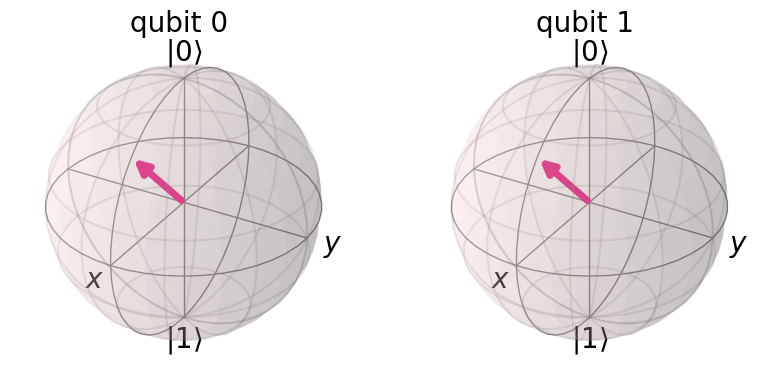

In [23]:
plot_bloch_multivector(orig_statevec)

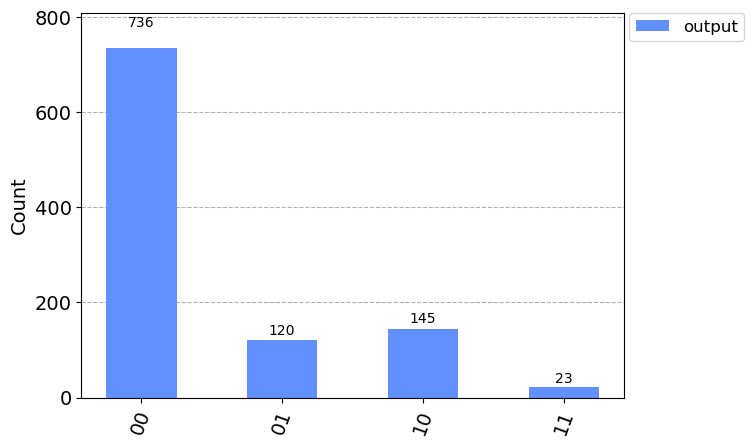

In [24]:
orig_counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['output'])

In [25]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.ry(math.pi/4,0)
c.ry(math.pi/4,1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
c.draw()

┌───┐┌─────────┐┌─┐   
q_0: ┤ H ├┤ Ry(π/4) ├┤M├───
     ├───┤├─────────┤└╥┘┌─┐
q_1: ┤ H ├┤ Ry(π/4) ├─╫─┤M├
     └───┘└─────────┘ ║ └╥┘
c: 2/═════════════════╩══╩═
                      0  1

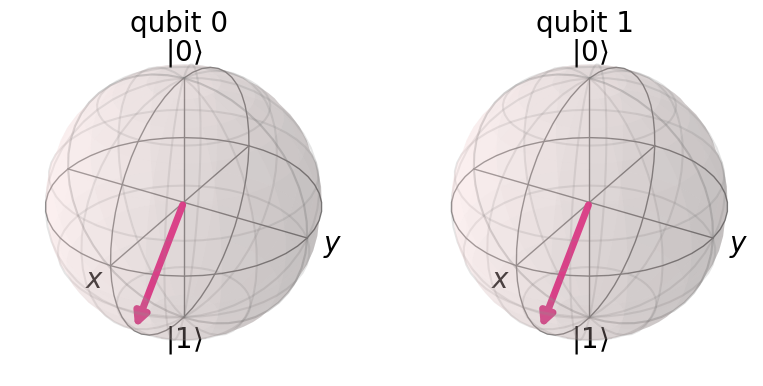

In [26]:
plot_bloch_multivector(statevec)

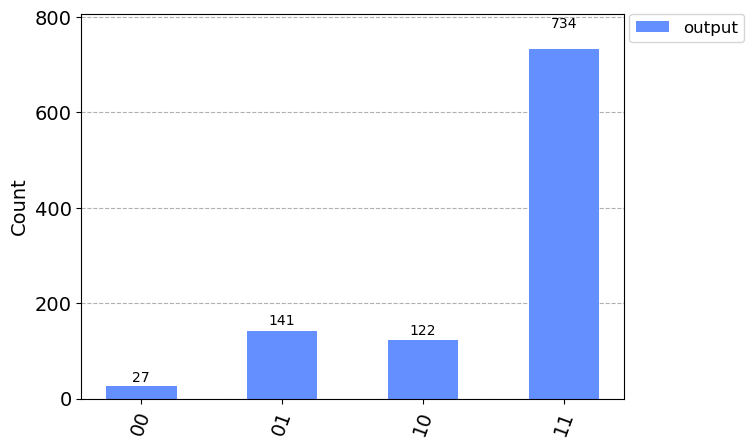

In [27]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

## Hadamard Sandwich of uncertain qubits

In [28]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.ry(math.pi/4,0)
c.ry(math.pi/4,1)
c.h(0)
c.h(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
c.draw()

┌───┐┌─────────┐┌───┐┌─┐   
q_0: ┤ H ├┤ Ry(π/4) ├┤ H ├┤M├───
     ├───┤├─────────┤├───┤└╥┘┌─┐
q_1: ┤ H ├┤ Ry(π/4) ├┤ H ├─╫─┤M├
     └───┘└─────────┘└───┘ ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

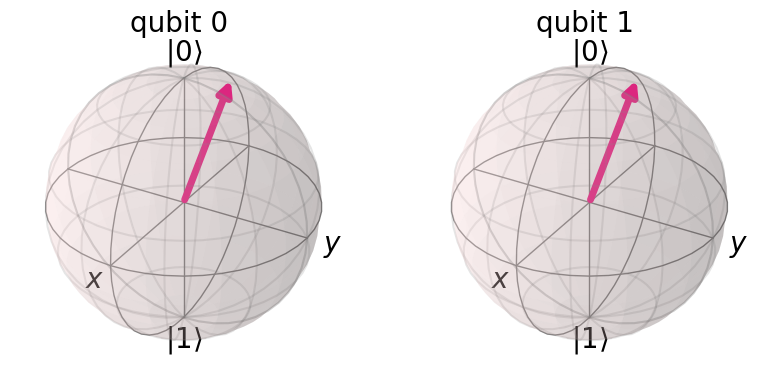

In [29]:
plot_bloch_multivector(statevec)

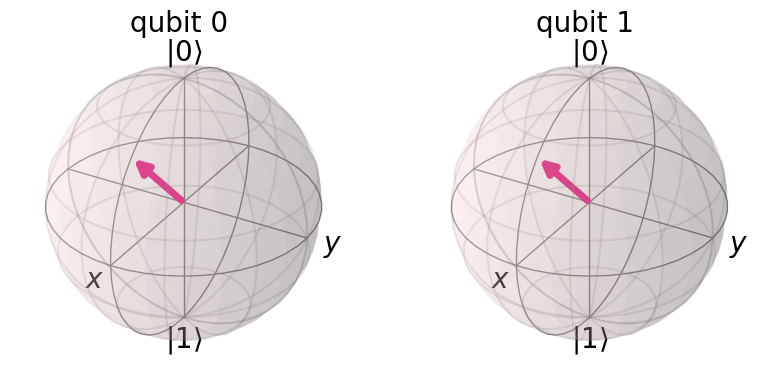

In [30]:
plot_bloch_multivector(orig_statevec)

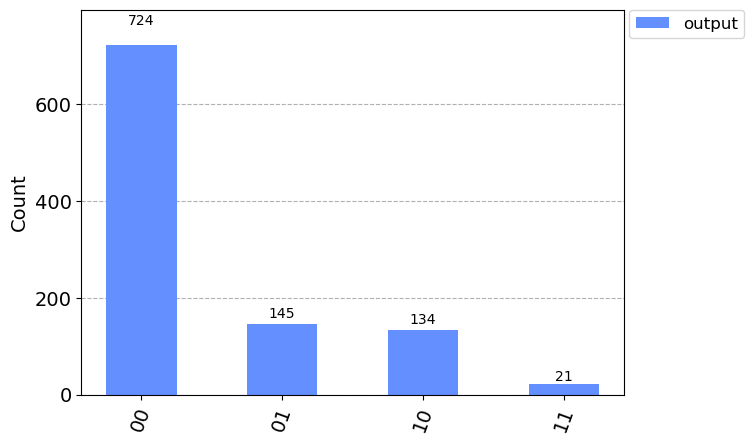

In [31]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

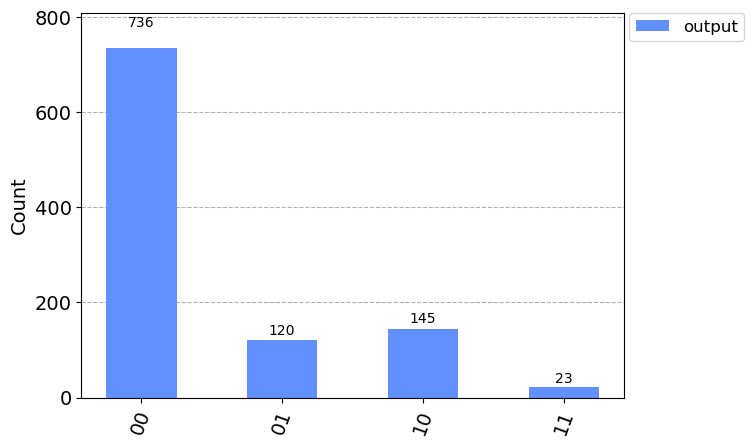

In [32]:
plot_histogram([orig_counts], legend=['output'])

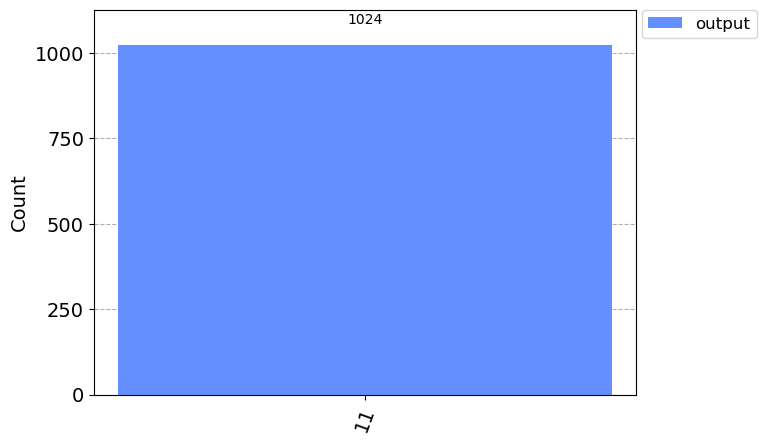

In [33]:
c = q.QuantumCircuit(2,2)
c.x(0)
c.x(1)
orig_statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
orig_counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['output'])

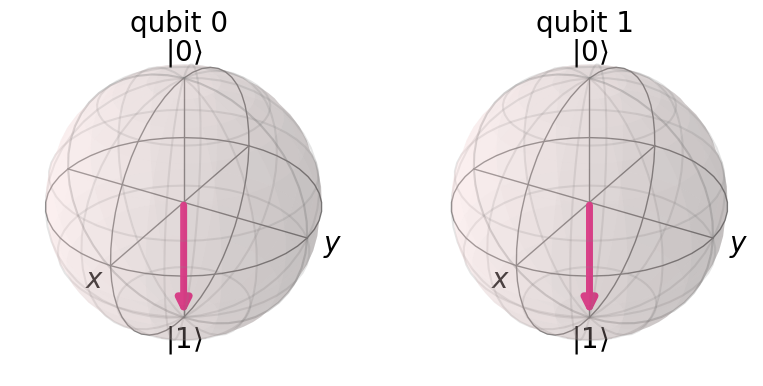

In [34]:
plot_bloch_multivector(orig_statevec)

## How Ian did it

In [35]:
def f1(x):
    if x == 0:
        return 0
    else:
        return 0

In [36]:
def f2(x):
    if x == 0:
        return 0
    else:
        return 1

In [37]:
def f3(x):
    if x == 0:
        return 1
    else:
        return 0

In [38]:
def f4(x):
    if x == 0:
        return 1
    else:
        return 1

In [39]:
L = [ f1, f2, f3, f4]

In [40]:
# random numbers and choices
import random

In [42]:
f = random.choice(L)

In [43]:
f(0)

0

In [44]:
f(1)

1

In [45]:
f

<function __main__.f2(x)>

In [46]:
# combinations and permutation
import itertools

In [47]:
list(itertools.product([0,1], repeat = 3))

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [49]:
list(itertools.product([0,1], repeat = 2))

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [53]:
def random_f():
    possible_Ls = list(itertools.product([0,1], repeat = 2))
    L = random.choice(possible_Ls)
    def f(x):
        return L[x]
    return f

In [65]:
f = random_f()

In [66]:
f(0)

0

In [67]:
f(1)

0

f is either constant or balanced. You can call f as many times as you want to figure out which it is, but try to do it in as few calls as possible